# Project 4 : Circumventing distance concentration phenomena
## Student : Alaâ-Eddine MAHI
### Description :
Several strategies can be developed to deal with distance concentration phenomena. One of them, consists in using suitable norms, and to project to lower dimensional spaces. Another one, consists in using a biasing potential which aims at focusing on the most informative distances only. In this project, we aim at applying the latter to a diﬀerent molecular data set, namely an ensemble of conformations of a protein model known as BLN69. In a nutshell, BLN69 is a linear chain of 69 beads; since each bead has 3 cartesian coordinates, a conformation is deﬁned by a point in dimension d = 3×69 = 207. To each conformation, one can also associate an energy, which will be given along with the conformations. Finally, to measure the distance between two conformations, we shall use the least root mean square deviation.
### Metrics :
#### Root-mean-square-deviaton : 
In bioinformatics, the root-mean-square deviation of atomic positions (or simply root-mean-square deviation, RMSD) is the measure of the average distance between the atoms (usually the backbone atoms) of superimposed proteins. Note that RMSD calculation can be applied to other, non-protein molecules, such as small organic molecules. In the study of globular protein conformations, one customarily measures the similarity in three-dimensional structure by the RMSD of the Cα atomic coordinates after optimal rigid body superposition. 
#### Kabsch algorithm :
The Kabsch algorithm, named after Wolfgang Kabsch, is a method for calculating the optimal rotation matrix that minimizes the RMSD (root mean squared deviation) between two paired sets of points. It is useful in graphics, cheminformatics to compare molecular structures, and also bioinformatics for comparing protein structures (in particular, see root-mean-square deviation (bioinformatics)). The algorithm only computes the rotation matrix, but it also requires the computation of a translation vector. When both the translation and rotation are actually performed, the algorithm is sometimes called partial Procrustes superimposition.

### Task 1 : select a reasonable number of local minima with low energy, and display them in 2D using multi-dimensional scaling (MDS), for example  the 10 lowest local minina.
#### Exploring the data set :

In [ ]:
#### Installing requirements
!pip install rmsd
!pip install tqdm
!pip install seaborn

In [1]:
#### LOADING PACKAGES
import numpy as np
import rmsd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.manifold import MDS
#import rpy2
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

In [16]:
#### LODAING MINIMA 
file = np.loadtxt('C:/Users/Alaa Eddine MAHI/Desktop/hybrid-TRRT-BH-BLN__minima_below_100.txt')

In [3]:
np.shape(file[0])

(208,)

In [4]:
#### Removing index
np.size(file[14215][1:])

207

In [5]:
#### Reshaping to xyz coordiantes 
file[14215][1:].reshape(-1,3)

array([[ 2.59927 , -1.52362 , -3.22789 ],
       [ 2.33363 , -1.14446 , -2.35701 ],
       [ 2.41286 , -0.164554, -2.41482 ],
       [ 2.15662 ,  0.113271, -1.50949 ],
       [ 2.27824 ,  1.09417 , -1.52357 ],
       [ 2.01834 ,  1.34884 , -0.611599],
       [ 2.18652 ,  2.32387 , -0.567543],
       [ 1.92618 ,  2.57345 ,  0.355252],
       [ 2.20657 ,  3.52133 ,  0.358836],
       [ 1.9897  ,  3.98956 ,  1.21651 ],
       [ 2.78314 ,  4.56685 ,  1.37528 ],
       [ 3.51827 ,  3.90716 ,  1.52538 ],
       [ 3.76377 ,  3.48968 ,  0.644358],
       [ 3.08642 ,  2.79395 ,  0.339985],
       [ 3.59525 ,  2.45946 , -0.470218],
       [ 3.07869 ,  1.66448 , -0.813454],
       [ 3.65997 ,  1.32124 , -1.56022 ],
       [ 3.1872  ,  0.469172, -1.81631 ],
       [ 3.75969 ,  0.115841, -2.56587 ],
       [ 3.28661 , -0.738321, -2.79026 ],
       [ 3.79991 , -1.07879 , -3.58749 ],
       [ 4.6111  , -1.4917  , -3.18582 ],
       [ 4.26415 , -1.67421 , -2.27262 ],
       [ 3.2849  , -1.8447  , -2.4

In [6]:
#### Selecting two conformations at random
P = file[14215][1:].reshape(-1,3)
Q = file[7210][1:].reshape(-1,3)
np.concatenate([P,Q], axis=0).reshape(2,-1)

array([[ 2.59927  , -1.52362  , -3.22789  ,  2.33363  , -1.14446  ,
        -2.35701  ,  2.41286  , -0.164554 , -2.41482  ,  2.15662  ,
         0.113271 , -1.50949  ,  2.27824  ,  1.09417  , -1.52357  ,
         2.01834  ,  1.34884  , -0.611599 ,  2.18652  ,  2.32387  ,
        -0.567543 ,  1.92618  ,  2.57345  ,  0.355252 ,  2.20657  ,
         3.52133  ,  0.358836 ,  1.9897   ,  3.98956  ,  1.21651  ,
         2.78314  ,  4.56685  ,  1.37528  ,  3.51827  ,  3.90716  ,
         1.52538  ,  3.76377  ,  3.48968  ,  0.644358 ,  3.08642  ,
         2.79395  ,  0.339985 ,  3.59525  ,  2.45946  , -0.470218 ,
         3.07869  ,  1.66448  , -0.813454 ,  3.65997  ,  1.32124  ,
        -1.56022  ,  3.1872   ,  0.469172 , -1.81631  ,  3.75969  ,
         0.115841 , -2.56587  ,  3.28661  , -0.738321 , -2.79026  ,
         3.79991  , -1.07879  , -3.58749  ,  4.6111   , -1.4917   ,
        -3.18582  ,  4.26415  , -1.67421  , -2.27262  ,  3.2849   ,
        -1.8447   , -2.41992  ,  2.90238  , -1.6

In [7]:
#### Understanding the RMSD distance
#### Translation
print ("RMSD before translation: ", rmsd.kabsch_rmsd(P, Q))
P -= rmsd.centroid(P)
Q -= rmsd.centroid(Q)
print ("RMSD after translation: ", rmsd.kabsch_rmsd(P, Q))

RMSD before translation:  4.66096955595
RMSD after translation:  0.511086677229


In [33]:
#### Rotation
mat = rmsd.kabsch_rotate(P,Q)

array([[-1.82118196, -1.60952677, -2.60845456],
       [-1.45908022, -1.39696538, -1.71600912],
       [-1.02157312, -0.51615695, -1.76699153],
       [-0.67752299, -0.40763047, -0.85467602],
       [-0.18587959,  0.44915933, -0.89142542],
       [ 0.14894133,  0.53612755,  0.02750189],
       [ 0.70197258,  1.35765025,  0.01462373],
       [ 1.03948768,  1.43739764,  0.94270865],
       [ 1.64950586,  2.20764124,  0.83449353],
       [ 2.0799633 ,  2.48864959,  1.69334004],
       [ 3.0104131 ,  2.71420817,  1.42612253],
       [ 3.38233649,  1.83481329,  1.13205681],
       [ 2.9839806 ,  1.59652042,  0.24026723],
       [ 2.02613272,  1.26181562,  0.31763848],
       [ 1.90047983,  0.99492795, -0.65200205],
       [ 1.00852719,  0.52697338, -0.69758053],
       [ 0.9657427 ,  0.21237437, -1.65285879],
       [ 0.12569725, -0.34389218, -1.65071235],
       [ 0.07059346, -0.66409363, -2.6040551 ],
       [-0.7555272 , -1.23016236, -2.57508724],
       [-0.87401098, -1.50723135, -3.536

In [9]:
X = file[14215][1:].reshape(-1, 3).T

In [10]:
#### Separtaing the x,y and z coordinates
X1 = X[0].T
X2 = X[1].T
X3 = X[2].T

In [11]:
#### Displayin the y coordinates
X2

array([ -2.32190648e+00,  -1.94274648e+00,  -9.62840478e-01,
        -6.85015478e-01,   2.95883522e-01,   5.50553522e-01,
         1.52558352e+00,   1.77516352e+00,   2.72304352e+00,
         3.19127352e+00,   3.76856352e+00,   3.10887352e+00,
         2.69139352e+00,   1.99566352e+00,   1.66117352e+00,
         8.66193522e-01,   5.22953522e-01,  -3.29114478e-01,
        -6.82445478e-01,  -1.53660748e+00,  -1.87707648e+00,
        -2.28998648e+00,  -2.47249648e+00,  -2.64298648e+00,
        -2.40095648e+00,  -1.43104848e+00,  -1.18108048e+00,
        -2.16635478e-01,   2.52852174e-03,   9.63863522e-01,
         1.08541352e+00,   2.04825352e+00,   2.05659352e+00,
         2.66348352e+00,   2.14762352e+00,   1.16841352e+00,
         9.47453522e-01,  -5.71124783e-02,  -3.65732478e-01,
        -1.36626548e+00,  -1.65999148e+00,  -2.66261648e+00,
        -2.94487648e+00,  -3.95060648e+00,  -4.22668648e+00,
        -3.84321648e+00,  -3.02535648e+00,  -2.45512648e+00,
        -1.78009948e+00,

In [122]:
from sklearn.manifold import MDS

In [13]:
mds = MDS(n_components=2)
y = mds.fit_transform(mat)

In [21]:
y

array([[-1.82661323, -7.52968739],
       [ 1.82661323,  7.52968739]])

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

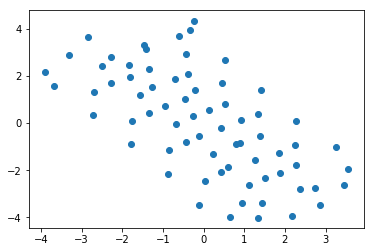

In [16]:
#### Plotting beads of the two seleted conformations 
plt.scatter(y[:,0],y[:,1])

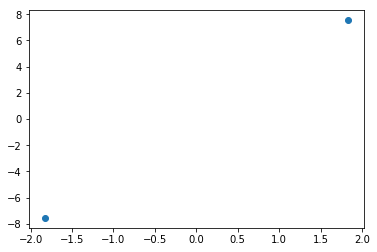

In [17]:
#### Plotting the conformations as two single points in 2D
y = mds.fit_transform(np.concatenate([P,Q], axis=0).reshape(2,-1))
plt.scatter(y[:,0],y[:,1])
plt.title('P and Q projection in 2D')

In [20]:
#### Computing the RMSD distance between P and Q
rmsd.rmsd(P, Q)

1.8655178877884273

#### Constructing the set T :
The set T contains the 10 lowest local minina.

In [87]:
#### Lowest 10 energy index
low_10 = []
index = [14725, 15697, 9361, 598547, 635923, 65179, 514166, 126122, 7604, 635917]
for i in index:
    low_10.append(file[i][1:].reshape(-1,3))

In [30]:
low_10[0]

array([[-3.54829  , -3.02082  , -2.89559  ],
       [-2.57638  , -3.06367  , -2.71984  ],
       [-2.47495  , -2.57707  , -1.87394  ],
       [-1.50419  , -2.66515  , -1.72158  ],
       [-1.38937  , -2.16994  , -0.878819 ],
       [-0.420998 , -2.25274  , -0.715454 ],
       [-0.309672 , -1.74988  ,  0.126175 ],
       [ 0.657882 , -1.84872  ,  0.318184 ],
       [ 0.716913 , -1.35039  ,  1.1739   ],
       [ 1.58164  , -1.5217   ,  1.64455  ],
       [ 1.45806  , -1.22088  ,  2.59805  ],
       [ 1.25371  , -0.235453 ,  2.61661  ],
       [ 0.285669 , -0.135025 ,  2.37407  ],
       [ 0.192945 , -0.433132 ,  1.41534  ],
       [-0.791999 , -0.409599 ,  1.26384  ],
       [-0.877411 , -0.818991 ,  0.355373 ],
       [-1.86772  , -0.814253 ,  0.221611 ],
       [-1.97649  , -1.25207  , -0.669522 ],
       [-2.96947  , -1.23111  , -0.795142 ],
       [-3.08397  , -1.6736   , -1.68031  ],
       [-4.07827  , -1.62951  , -1.82515  ],
       [-4.18839  , -1.08269  , -2.65664  ],
       [-3

In [45]:
#### Constructing the distance matrix of the T set
N = len(low_10)
mat = np.zeros((N,N))
for ii,i in enumerate(low_10):
    for jj,j in enumerate(low_10):
        mat[ii,jj] = float(rmsd.kabsch_rmsd(i,j))
mat

array([[  1.69725920e-15,   1.48963630e+00,   1.55508587e+00,
          1.85433302e+00,   2.48216667e+00,   3.66993775e+00,
          4.91586637e+00,   3.06416618e+00,   2.43053163e+00,
          2.44228518e+00],
       [  1.48963630e+00,   8.77325180e-16,   1.94503610e+00,
          1.65697603e+00,   2.28899802e+00,   5.10407167e+00,
          5.94866812e+00,   3.12213288e+00,   1.74718927e+00,
          2.28986553e+00],
       [  1.55508587e+00,   1.94503610e+00,   1.05462952e-15,
          2.82022583e+00,   1.23664047e+00,   4.45437801e+00,
          5.67377174e+00,   2.67908247e+00,   3.25192547e+00,
          1.31190824e+00],
       [  1.85433302e+00,   1.65697603e+00,   2.82022583e+00,
          1.64776499e-15,   1.84639234e+00,   4.35783431e+00,
          4.54259775e+00,   1.82873069e+00,   1.27829017e+00,
          1.79602237e+00],
       [  2.48216667e+00,   2.28899802e+00,   1.23664047e+00,
          1.84639234e+00,   1.04153612e-15,   4.59017395e+00,
          4.92028149e+00

In [38]:
#### Computing the LRMSD of the first two elements of T
rmsd.kabsch_rmsd(low_10[0],low_10[1])

1.4896362969055272

C:\Users\Alaa Eddine MAHI\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


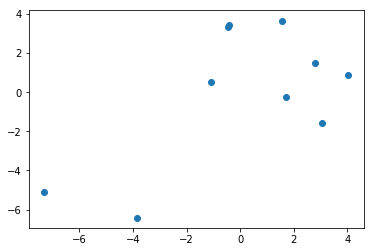

In [60]:
#### Projecting the T set in 2D using MDS
mds = MDS(n_components=2)
y = mds.fit_transform(mat)
plt.scatter(y[:,0],y[:,1])
plt.title('Projecting the set T in 2D')

### Task 2 : analyze pairwise distances between selected conformations.
#### PART I : select a subset S1 of n (ie 1000) conformations by retaining the low energy conformations only using topological persistance
##### NB :  In this part we used both python and R to construct the persistence diagram, since R provided the TDA library absent in python.

#### Constructing the energy landscape

In [141]:
file1 = np.loadtxt('C:/Users/Alaa Eddine MAHI/Desktop/hybrid-TRRT-BH-BLN__energies_below_100.txt')

In [142]:
#### lowest 10 index
index = np.argsort(file1)[:10]
index

array([ 14725,  15697,   9361, 598547, 635923,  65179, 514166, 126122,
         7604, 635917], dtype=int64)

In [11]:
#### The energy of the 14725-th conformation
file1[14725]

-105.1596192497542

In [22]:
#### The number of conformations
len(file)

666113

In [24]:
#### x represents the distance from the origin for all conformations
#### y represents the energy corresponding to each distance 
x = []
y = []
for i in range(len(file)):
    x.append(rmsd.kabsch_rmsd(file[0][1:].reshape(-1,3),file[i][1:].reshape(-1,3)))
    y.append(file1[i])

In [25]:
#### f represents the mapping from distance to energy (ie x to y)
from scipy.interpolate import interp1d
x_array =  np.asarray(x)
y_array = np.asarray(y)
f = interp1d(x_array, y_array, kind='cubic')

In [26]:
np.savetxt('coords.txt', x_array)

In [33]:
import pickle
with open('interpolator.pkl', 'wb') as file:
    pickle.dump(f, file)

In [3]:
with open('interpolator.pkl', 'rb') as handle:
    f = pickle.load(handle)

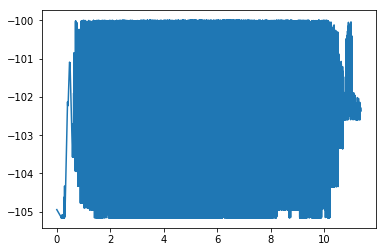

In [5]:
#### Plotting the energy landscape for all conformations 
x_array = np.loadtxt('coords.txt')
plt.plot(np.sort(x_array), f(np.sort(x_array)))
plt.title('Energy landscape for all conformations')

In [32]:
x_array

array([  9.15246510e-16,   1.65072584e-01,   1.62209948e-01, ...,
         7.24027458e+00,   7.21196474e+00,   7.18345562e+00])

In [2]:
coords = np.loadtxt('coords.txt')

In [21]:
sort_index = np.argsort(coords[:10])

In [22]:
energies = []
for i in sort_index:
    energies.append(file1[i])

Text(0.5,1,'Energy Landscape')

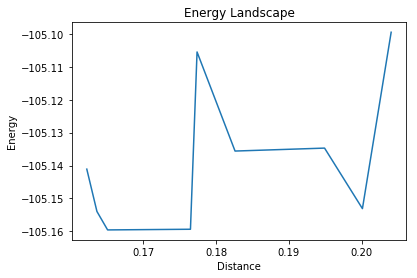

In [25]:
plt.plot(np.sort(coords[1:10]),energies[1:])
plt.xlabel('Distance')
plt.ylabel('Energy')
plt.title('Energy Landscape')

Text(0.5,1,'Energy Landscape lowest 10')

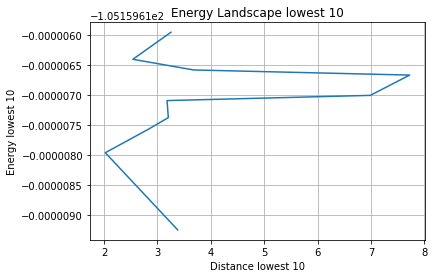

In [50]:
index = [14725, 15697, 9361, 598547, 635923, 65179, 514166, 126122, 7604, 635917]
energies_10 = []
coords_10 = []
for i in index:
    energies_10.append(file1[i])
    coords_10.append(coords[i])
x_array =  np.asarray(coords_10)
y_array = f(x_array)
plt.plot(x_array, y_array)
plt.grid(True)
plt.xlabel('Distance lowest 10')
plt.ylabel('Energy lowest 10')
plt.title('Energy Landscape lowest 10')

In [10]:
!pip install rpy2

In [12]:
import rpy2

#### Constructing the persistence diagram in R

#### Description :
We compute the most persistent local minimas in R, and we load the corresponding index to form the S1 data set. The corresponding code is in the file persistance.R

Zoomed in persistence diagram
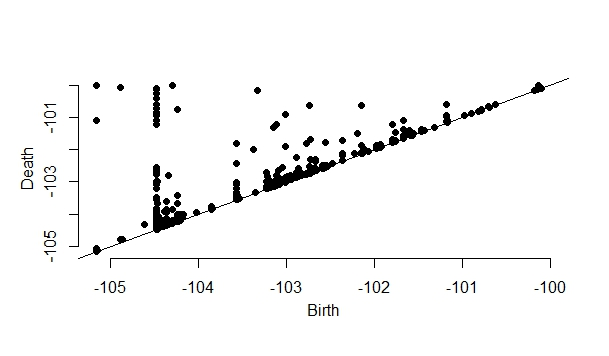

In [ ]:
index_S1 = np.argsort(np.loadtxt('persistance_737078.txt'))[::-1][:1000]
len(index_S1)

In [12]:
index_S1 = np.argsort(np.loadtxt('persistance_737078.txt'))[::-1][:1000]
len(index_S1)

1000

In [ ]:
np.savetxt('index_S1.txt', index_S1)

In [23]:
#### Constructing S1
S_1 = []
index_S1 = np.loadtxt('index_737078.txt')[:1000]
for i in index_S1:
    S_1.append(file[int(i)][1:].reshape(-1,3))    

In [24]:
#### Constructing the distance matrix
N = len(S_1)
mat = np.zeros((N,N))
for ii,i in enumerate(S_1):
    for jj,j in enumerate(S_1):
        mat[ii,jj] = float(rmsd.kabsch_rmsd(i,j))

C:\Users\Alaa Eddine MAHI\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


Text(0.5,1,'2D projection of the S1 set')

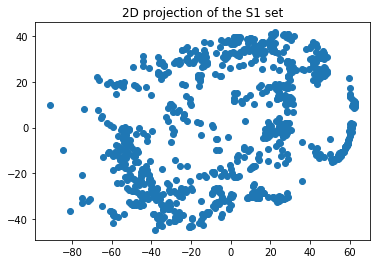

In [12]:
#### Projecting in 2D
mds = MDS(n_components=2)
y = mds.fit_transform(mat)
plt.scatter(y[:,0],y[:,1])
plt.title('2D projection of the S1 set')

#### PART II : select a subsetS2 of n (ie 1000) conformations maximizing the distances between the conformations selected using smart seeding .
##### Description : Smart Seeding algorithm 
    1-Choose one conformation uniformly at random from among the data points.
    2-For each data point x, compute D(x), the distance between x and the nearest conformation that has already been chosen.
    3-Choose one new data point at random as a new conformation, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)².
    4-Repeat Steps 2 and 3 until n conformations have been chosen

In [18]:
#### Using the full data set
#### smart seeding algorithm
size = 1000
index_S2 = []
dist = []
j = np.random.randint(0,len(file)-1)
i = 0
while i < 1000:
    for k in tqdm(range(len(file))):
        dist.append(rmsd.kabsch_rmsd(file[j][1:].reshape(-1,3),file[k][1:].reshape(-1,3)))
    index_S2.append(np.argmax(dist))
    X = np.array(dist)**2
    proba = [float(i)/sum(X) for i in X]
    j = int(np.random.choice(np.arange(0, len(file)), size=1, replace=False, p=proba))    
    i += 1
    break

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 666113/666113 [06:45<00:00, 1641.63it/s]


In [106]:
#### Using only 2n nearest neighbors
#### fast seeding algorithm
size = 1000
index_S2 = []
dist = []
j = np.random.randint(0,len(file)-1)
i = 0
while i < 1000:
    for k in tqdm(range(max(0,j-size), min(j+size,len(file)-1))):
        dist.append(rmsd.kabsch_rmsd(file[j][1:].reshape(-1,3),file[k][1:].reshape(-1,3)))
    if np.argmax(dist)>len(dist)/2:
        index_S2.append(min(j+np.argmax(dist),len(file)-1))
    else :
        index_S2.append(min(abs(j-np.argmax(dist)), len(file)-1))
    j = np.random.randint(0,len(file)-1)
    i += 1

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2103.87it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2023.55it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2026.52it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1972.65it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2100.93it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1838.11it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1888.50it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2083.19it/s]


In [107]:
np.savetxt('index_S2.txt', np.array(index_S2))

In [108]:
S_2 = []
index_S2 = np.loadtxt('index_S2.txt')[:1000]
for i in index_S2:
    S_2.append(file[int(i)][1:].reshape(-1,3)) 

In [109]:
N = len(S_2)
mat = np.zeros((N,N))
for ii,i in enumerate(S_2):
    for jj,j in enumerate(S_2):
        mat[ii,jj] = float(rmsd.kabsch_rmsd(i,j))

C:\Users\Alaa Eddine MAHI\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


Text(0.5,1,'2D projection of the S2 set')

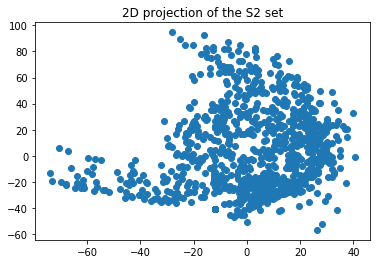

In [110]:
mds = MDS(n_components=2)
y = mds.fit_transform(mat)
plt.scatter(y[:,0],y[:,1])
plt.title('2D projection of the S2 set')

### Task 3 :  produce a plot  of the histogram for the distribution of distances between pairs of frames.

#### 1. Histogram of the distances from origin for all comformations

In [29]:
coords = np.loadtxt('coords.txt')

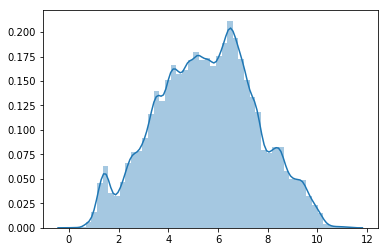

In [30]:
import seaborn as sns
sns.distplot(coords)

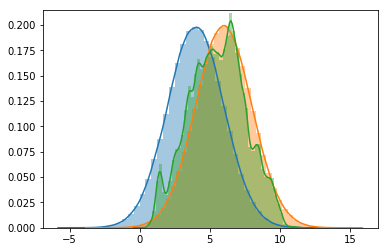

In [31]:
def gaussian(mu, std):
 return np.random.normal(loc=mu, scale=std, size=len(coords))
sns.distplot(2*gaussian(2,1))
sns.distplot(2*gaussian(3,1))
sns.distplot(coords)

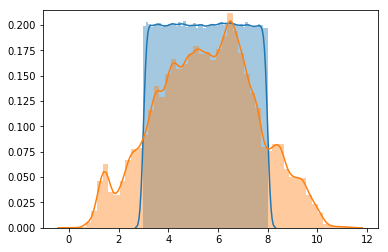

In [95]:
sns.distplot(np.random.uniform(3,8, size=len(coords)))
sns.distplot(coords)

In [95]:
#### Toning down non informative distances
import numpy as np

def sigmoid(x, derivative=False):
  return x*(1-x) if derivative else 1/(1+np.exp(-x))

In [96]:
sigmoid_ = np.vectorize(sigmoid)

In [21]:
sigmoid_(coords)

array([ 0.5       ,  0.54117469,  0.5404638 , ...,  0.9992834 ,
        0.99926284,  0.99924154])

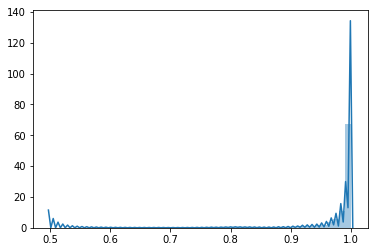

In [22]:
sns.distplot(sigmoid_(coords))

#### 2. Histogram of distances for the S1 set

In [ ]:
#### Constructing S1
S_1 = []
index_S1 = np.loadtxt('index_737078.txt')[:1000]
for i in index_S1:
    S_1.append(file[int(i)][1:].reshape(-1,3)) 

In [ ]:
#### Constructing the distance matrix
N = len(S_1)
mat = np.zeros((N,N))
for ii,i in enumerate(S_1):
    for jj,j in enumerate(S_1):
        mat[ii,jj] = float(rmsd.kabsch_rmsd(i,j))

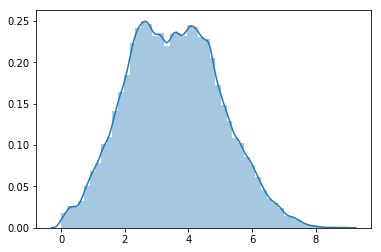

In [28]:
import seaborn as sns
sns.distplot(mat.reshape(-1,1))

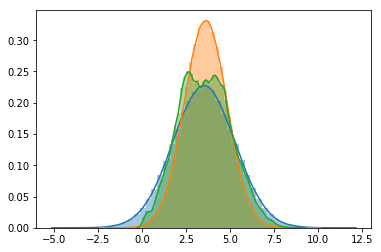

In [76]:
sns.distplot(3.5*gaussian(1,.5))
sns.distplot(6*gaussian(0.6,0.2))
sns.distplot(mat.reshape(-1,1))

#### Interpretation for the set S1: 
In the figure above, we observe that the long range part of this distribution resembles that obtained from a Gaussian distribution of points. Infact, only when r is between 2 and 6 is there a marked deviation from the gaussian distribution— as lower decay toward zero.For values of r of about one this decay resembles that of a Gaussian distribution in the full, 69-dimensional space in agreement with what one would expect for the fluctuations within a harmonic basin. We therefore postulate that the most interesting distances are those between about two and six the histogram does  resemble neither the Gaussian or uniform distribution.

In the regions which can be represented as Gaussian distributions, the distance concentration phenomenon confirms the Gaussian annulus theorem seen in class for random sampled points in dimension 69.

#### 3. Histogram of distances for the S2 set

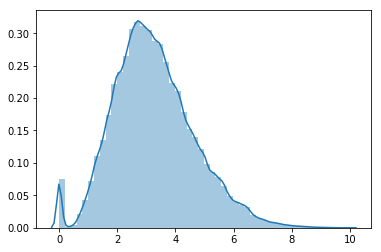

In [111]:
sns.distplot(mat.reshape(-1,1))

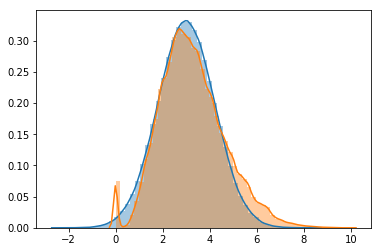

In [114]:
sns.distplot(6*gaussian(0.5,0.2))
sns.distplot(mat.reshape(-1,1))

#### Interpretation for the set S2: 
In the figure above, we observe that the long range part of this distribution does not resemble that obtained from a Gaussian distribution of points. Infact, only when r is above 5 is there a marked deviation from the gaussian distribution— as lower decay toward zero.For values of r of about one and up yo 5 this decay resembles that of a Gaussian distribution in the full, 69-dimensional space. We therefore postulate that the most interesting distances are the tails of the distribution where the histogram does  resemble neither the Gaussian or uniform distribution. The distance concentration phonemenon is minimal.

### Task 4 :  Analyse the distributions of pairwise distances for the sets S1 and S2.

#### Interpretation for the set S1: 
In the figure above, we observe that the long range part of this distribution resembles that obtained from a Gaussian distribution of points. Infact, only when r is between 2 and 6 is there a marked deviation from the gaussian distribution— as lower decay toward zero.For values of r of about one this decay resembles that of a Gaussian distribution in the full, 69-dimensional space in agreement with what one would expect for the fluctuations within a harmonic basin. We therefore postulate that the most interesting distances are those between about two and six the histogram does  resemble neither the Gaussian or uniform distribution.

In the regions which can be represented as Gaussian distributions, the distance concentration confirms the Gaussian annulus theorem seen in class for random sampled points in dimension 69.

#### Interpretation for the set S2: 
In the figure above, we observe that the long range part of this distribution does not resemble that obtained from a Gaussian distribution of points. Infact, only when r is above 5 is there a marked deviation from the gaussian distribution— as lower decay toward zero.For values of r of about one and up yo 5 this decay resembles that of a Gaussian distribution in the full, 69-dimensional space. We therefore postulate that the most interesting distances are the tails of the distribution where the histogram does  resemble neither the Gaussian or uniform distribution. The distance concentration phonemenon is minimal.

### Task 5 :  use a sigmoid function function to tone down non informative distances. Using MDS, compute the 2D embedding deﬁned by the distance matrix, then project the set T using this embedding.

In [ ]:
#### Constructing the distance matrix of the S1 set
N = len(S_1)
mat = np.zeros((N,N))
for ii,i in enumerate(S_1):
    for jj,j in enumerate(S_1):
        mat[ii,jj] = float(rmsd.kabsch_rmsd(i,j))

In [92]:
#### Constructing the distance matrix of the T set
N = len(low_10)
mat0 = np.zeros((N,N))
for ii,i in enumerate(low_10):
    for jj,j in enumerate(low_10):
        mat0[ii,jj] = float(rmsd.kabsch_rmsd(i,j))

In [ ]:
#### Toning down distances
sigmoid_(mat)

In [100]:
#### Projecting in 2D
mds = MDS(n_components=2)
mds.fit(mat)
y = mds.fit_transform(mat0)

C:\Users\Alaa Eddine MAHI\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


Text(0.5,1,'2D projection of the S1 set using toned distances embedding')

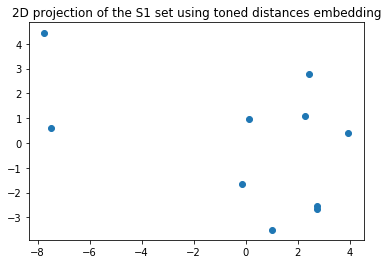

In [101]:
plt.scatter(y[:,0],y[:,1])
plt.title('2D projection of the S1 set using toned distances embedding')

Text(0.5,1,'Energy Landscape lowest 10')

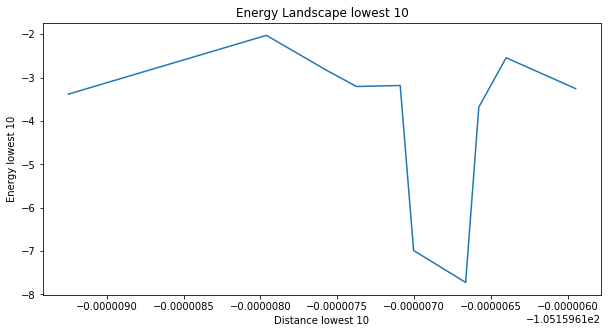

In [4]:
index = [14725, 15697, 9361, 598547, 635923, 65179, 514166, 126122, 7604, 635917]
coords_10 = []
for i in index:
    coords_10.append(coords[i])
x_array =  np.asarray(coords_10)
y_array = f(x_array)
plt.figure(figsize=(10,5))
plt.plot(y_array, -x_array)
plt.xlabel('Distance lowest 10')
plt.ylabel('Energy lowest 10')
plt.title('Energy Landscape lowest 10')

#### Interpretation :
Compared to the plot obtained in the first question, the above plot is different in that it is similar to the energy landscape for the ten lowest minima drawn in the second question. However, we observe that the distances between the points are preserved as the MDS conserves dissimilarity between points. we can interpret this plot as a 2D projection of a harmonic energy basin.

# References

[1] M. Ceriotti, G. Tribello, and M. Parrinello. Simplifying the representation of complex free-energy landscapes using sketch-map. PNAS, 108(32):13023–13028, 2011.

[2] A. Roth, T. Dreyfus, C.H. Robert, and F. Cazals. Hybridizing rapidly growing random trees and basin hopping yields an improved exploration of energy landscapes. J. of Computational Chemistry, 37(8):739–752, 2016.

[3] F. Cazals, T. Dreyfus, D. Mazauric, A. Roth, and C.H. Robert. Conformational ensembles and sampled energy landscapes: Analysis and comparison. J. of Computational Chemistry, 36(16):1213–1231, 2015.